<a href="https://colab.research.google.com/github/krahul2024/machine-learning/blob/main/Tutorials/Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Linear Regression

**Single Linear Regression :**
*It is supervised learning algorithm, here we have one input column and one output column, just like `y = mx + c`*
In this case we have one feature and one target/output, we have to derive an equation based on given examples of feature(only one) and relate it with the target.
The result of single linear regresion is a straight line equation.
```
 y = wx + b, b being the intercept/bias.
```
First thing is we can do with any data is to plot it, we can observe from any data is linearity/non-linearity. In any case(whether the data is linear/non-linear), we can always draw a straight line which is closest to most of the data points, as we are performing single linear regression.


To get started with single linear regression problem, we can get some random points and then try to predict result for some other points, which we didn't consider during analysis/training.



In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
print('Done.')

Done.


In [3]:
# generate dataset for our single linear regression
feature = np.linspace(-430, 432, 100)
target = np.linspace(-53, 67, 100)

feature[:10], target[:10]

(array([-430.        , -421.29292929, -412.58585859, -403.87878788,
        -395.17171717, -386.46464646, -377.75757576, -369.05050505,
        -360.34343434, -351.63636364]),
 array([-53.        , -51.78787879, -50.57575758, -49.36363636,
        -48.15151515, -46.93939394, -45.72727273, -44.51515152,
        -43.3030303 , -42.09090909]))

In [4]:
# generate a pandas dataframe

data = pd.DataFrame(
    data = {
        'Feature' : [np.round(x, 2) for x in feature],
        'Target': [np.round(x, 2) for x in target]
      }
  )

data.head()

,Feature,Target
0,-430.00,-53.00
1,-421.29,-51.79
2,-412.59,-50.58
3,-403.88,-49.36
4,-395.17,-48.15


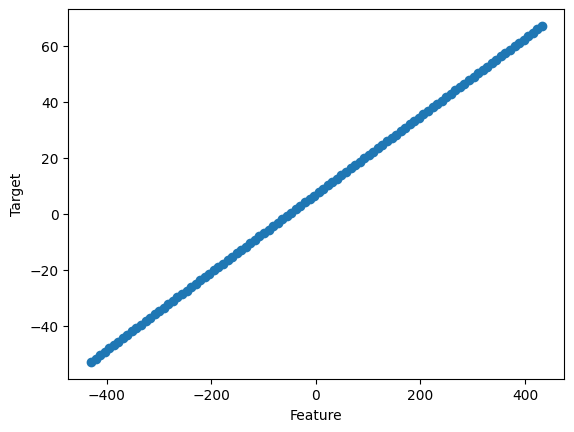

In [5]:
# plot the points
plt.scatter(data['Feature'], data['Target'])
plt.xlabel('Feature')
plt.ylabel('Target')

plt.show()

*In this case we can see the generated data fits in a perfect straight line but it is usually not the case in real datasets*


In [6]:
x = data['Feature'].values.reshape(-1, 1) # doing this reshape because the built-in regression model expects 2d array
y = data['Target'].values.reshape(-1, 1)

# Divide the dataset into training and testing datasets
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(
    x, y, test_size = 0.2
)

train_x.shape, train_y.shape

((80, 1), (80, 1))

In [7]:
# Using built-in Linear Regression method from sklearn
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

# training the model
lr_model.fit(train_x, train_y)
print('Training Completed.')

Training Completed.


Prediction for each of the `test_x` array values, and then comparing them with the `test_y`(the actual output), we will use mean absolute error for this comparison.

In [8]:
lr_result = lr_model.predict(test_x)
result = pd.DataFrame(
    data = {
        'Actual Value' : [x[0] for x in test_y],
        'Predicted_value' : [x[0] for x in lr_result],
        'Error' : [abs(np.round(x[0] - y[0], 5)) for x, y in zip(test_y, lr_result)]
        }
    )

result.head(10)

,Actual Value,Predicted_value,Error
0,-27.55,-27.545290,0.00471
1,35.48,35.485759,0.00576
2,52.45,52.455710,0.00571
3,1.55,1.545856,0.00414
4,-36.03,-36.030266,0.00027
5,-2.09,-2.090363,0.00036
6,-4.52,-4.515438,0.00456
7,30.64,30.637002,0.00300
8,-26.33,-26.332753,0.00275
9,45.18,45.181879,0.00188


we can see we are getting some error, which is negligible, but we also know that this data was already in a perfect straight line shape, so this doesn't help much. Working on a real dataset would give us some insights about the errors with this approach.

In [9]:
cars = pd.read_csv('https://raw.githubusercontent.com/krahul2024/machine-learning/main/datasets/Used%20Car%20Dataset.csv')
cars.head()

,Unnamed: 0,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,0,2017 Mercedes-Benz S-Class S400,Jul-17,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75
1,1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99
2,2,2018 BMW X1 sDrive 20d xLine,Sep-18,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75
3,3,2019 Kia Seltos GTX Plus,Dec-19,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56
4,4,2019 Skoda Superb LK 1.8 TSI AT,Aug-19,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00


In [10]:
cars.isnull().sum()

Unnamed: 0            0
car_name              0
registration_year     0
insurance_validity    0
fuel_type             0
seats                 0
kms_driven            0
ownsership            0
transmission          0
manufacturing_year    0
mileage(kmpl)         3
engine(cc)            3
max_power(bhp)        3
torque(Nm)            4
price(in lakhs)       0
dtype: int64

There are no missing values in this dataset, so we can just use this dataset without getting into the data analysis part(as of now). To apply the single linear regression method on this dataset we can continue with kms_driven as a feature and price as the target.

In [11]:
x = cars['kms_driven'].values.reshape(-1, 1)
y = cars['price(in lakhs)'].values.reshape(-1, 1)


In [12]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2)
train_x.shape

(1242, 1)

In [13]:
lr_model = LinearRegression()

lr_model.fit(train_x, train_y)
print('Done.')

Done.


In [14]:
preds = lr_model.predict(test_x)

results = pd.DataFrame(
    data = {
        'Actual' : [x[0] for x in test_y],
        'Prediction' : [np.round(x[0], 3) for x in preds],
        'Error' : [abs(np.round(x[0] - y[0], 3)) for x,y in zip(test_y, preds)]
    }
)

results.head()

,Actual,Prediction,Error
0,4.21,146.016,141.806
1,5.25,147.701,142.451
2,16.50,148.588,132.088
3,18.20,148.455,130.255
4,3.57,146.401,142.831


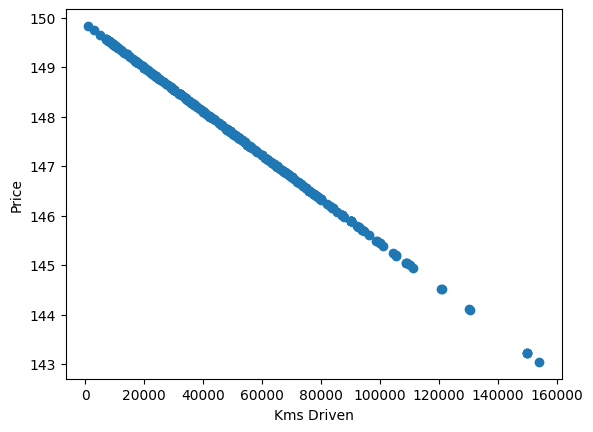

In [15]:
plt.scatter([x[0] for x in test_x], results['Prediction'])
plt.xlabel('Kms Driven')
plt.ylabel('Price')
plt.show()

We can see that relation between kms_driven and price is inverse, also that our predictions are very much off from actual prices, so these are the cases(almost all), where we can't just rely on single linear regression and we are required to use multiple features as we can't just base a car's price on the basis of how many kms_driven, we have to use mileage, make, years_old and various other features etc and to use all these features we use multiple linear regression( uses more than one features).
The equation is  :  $$ y = w_0 + w_1x_1 + \ldots + w_nx_n $$

In cases of linear regression, we can change the x-coefficient(s), intercept and see the losses and base our prediction line accordingly.

In case of this, single linear regression the implementation is given below. There are many solutions for this problem, one of them is using *closed form solution*.
**Closed form solution** : when a problem can be solved using straightforward solution or when an equation which can be solved in terms of functions and mathematical operations. Opposite of this is numerical method solution, where a problem is solved iteratively, using approximation. examples of numerical methods are *Newton-Raphson, Gradient Descent*. let's say for this equation $$ sin(x) + e^x = 0$$
we might not solve it using a direct method, so we go for some approximate solution, In case of closed form solutions, we don't use differentiation and integraion.

Linear/Quadratic/Exponential equations are some of the closed form solvable. We can say when our algorithm improves over multiple iterations that it is not a closed form solution, just in case of gradient descent.

*why do we even need to discuss the concept of non-closed form solutions, when we have a straight-forward formula to solve our problem?*

When we increase the number of features of dimensions, we see the problem with this closed-form solution, as it can't handle a large number of dimensions.

For a single dimension we can use the above formula for below variables:  

$$ y = w \times x  + b $$

Let's say we have some points, our goal is to minimize the distance between points and the optimal line. Let's take the distance of points from the line(optimal), and square them(why square?, we can't differentiate if we take the absolute of distances as modulus function is not differentiable on origin and another reason is we can penalize outliers when using squares), so we sum all the squares of differences.

$$ E = ∑_{i=1}^{n} d_{i}^2 $$

here d is the distance of any point from the line.
let's say the equation of prediction is
$$ \hat{y_{i}} = w \times x_{i} + b $$
here $$ \hat{y_{i}}$$ is the predicted value, we are summing the errors so it can be written as
$$ E(w,b) = ∑_{i=1}^{n}(y_i - w× x_i - b)^2 $$

where $$ y_i $$ is the actual output.

In this equation values of `b` and `w` can be calculated as
$$ b = y̅ - w \times x̅ $$

where $$ y̅ $$ is the mean of all the actual y values and $$ x̅ $$ is the mean of all the x values, w can be calculated as

$$ w = \frac{∑_{i=1}^{n} (x_i - x̅)(y_i - y̅)}{∑_{i=1}^{n}(x_i - x̅)^2}$$

where all the notations have their usual meanings(mentioned above).

Implementation of this simple linear regression from scratch.

In [71]:
class LinearReg:
  def __init__(self):
    self.w = None
    self.b = None

  def fit(self, train_x_, train_y_):
    # training a model is simply calculation of the weights
    # first we have to agree on an input format, the input format here will just be an array with shape = (n, ) and same for the output shape = (n, )
    if len(train_x_.shape) != 1:
      raise TypeError(f"Dimension of training data is {train_x_.shape}, where as required dimension is (n, )")
    if len(train_y_.shape) != 1 or train_y_.shape[0] != train_x_.shape[0]:
      raise TypeError(f"Dimension of input and output data don't match, dimension of input : {train_x_.shape} and dimension of output : {train_y_.shape}")

    # calculation of the weight/slope -> w
    mean_x_, mean_y_ = train_x_.mean(), train_y_.mean()
    num = sum([(x_ - mean_x_) * (y_ - mean_y_) for x_, y_ in zip(train_x_, train_y_)])
    den = sum([(x_ - mean_x_)**2 for x_ in train_x_])
    self.w = num / den
    self.b = mean_y_ - self.w * mean_x_


  def predict(self, test_x_):
    # the agreed input format is (n, ), so we have to just return the predictions
    if len(test_x_.shape) != 1 :
      raise TypeError(f"Dimension doesn't match, it should be in the format of (n, )")
    return self.w * test_x + self.b

  def weights(self, ):
    print(f"Slope is {self.w}, Intercept is {self.b}")
    # return (self.w, self.b)


print('Done.')

Done.


In [67]:
x__ = train_x.reshape(-1)
y__ = train_y.reshape(-1)

x__.shape, y__.shape

((1242,), (1242,))

In [72]:
lin_model = LinearReg()

lin_model.fit(x__, y__)

print( lr_model.coef_[0], lr_model.intercept_)

lin_model.weights()

[-4.43683495e-05] [149.87491243]
Slope is -4.436834946762446e-05, Intercept is 149.87491242587305


In [70]:
preds__ = lin_model.predict(test_x.reshape(-1))

preds__[:5], preds[:5]

(array([[146.01570902],
        [147.7008633 ],
        [148.58823029],
        [148.45512524],
        [146.40051572]]),
 array([[146.01570902],
        [147.7008633 ],
        [148.58823029],
        [148.45512524],
        [146.40051572]]))

**Evaluation metrics to measure the accuracy of Regression outputs.**
1. MAE(Mean Absolute Error) :  Let's say we have found an optimal line(it consists of points and all the predicted points lie on this line), then we can see how much predicted points differ from acutal points(co-ordinate difference), in this case we take sum of total absolute error and then average it.

$$ MAE = \frac{ \sum_{i=1}^{n} |y_i - \hat{y_i}| } { n } $$

  The value which we get is in the units of y, it robust to outliers. Problems with this method is we are using absolute function and this modulus function is not differentiable, we can't use some of the optimization tekniks like gradient descent.This problem is solved by MSE.

2. MSE(Mean Squared Error) : In this case instead of taking absolute of differences, square of differences is used.

$$ MSE = \frac{\sum_{i=1}^{n} (y_i - \hat{y_i})^2 }{n} $$

  Disadvantage of this approach is not in the same unit as output, it will be square of the output unit, this penalizes outliers a lot, and influenced a lot by outliers and not robust to the outliers.

3. RMSE : It is also not robust to the outliers, output is in the same unit.

$$ RMSE = \sqrt{\frac{\sum_{i=1}^{n} (y_i - \hat{y_i})^2 }{n}} $$

4. R2 Score :